GENERATION OF IMAGES USING TRANSFORMER



Use your own custom data to generate images using Conv2D and transformers .

Step1 : To prepare dataset
1. load the video
2. convert video to frames and store in a folder
3. convert frames to array and also to greyscale and save it as .npy file
4. Extract images and labels from the dataset
5. Store them in separate .npy files

In [ ]:
import cv2
import os
import numpy as np

def load_images_and_labels_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            # Load image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert image to grayscale if needed
            if img is not None:
                # Resize image to 28x28
                resized_img = cv2.resize(img, (28, 28))
                # Extract class label from frame name
                class_label = filename.split('_')[-1].split('.')[0][5:]  # Extracting from 'frame0' onwards
                # You can further process the class_label if needed
                # For example, if you want to extract just the class name and remove "g01_c01", you can do:
                # class_label = class_label.split('_')[0]
                images.append(resized_img)
                labels.append(class_label)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

folder_path = '/content/drive/MyDrive/MultiMedia_ActionPrediction_Project3/test_video/required/'
train_images, train_labels = load_images_and_labels_from_folder(folder_path)

# Save the numpy arrays containing images and labels
np.save('/content/drive/MyDrive/MultiMedia_ActionPrediction_Project3/test_video/train1_images.npy', train_images)
np.save('/content/drive/MyDrive/MultiMedia_ActionPrediction_Project3/test_video/train1_labels.npy', train_labels)

# Print the shapes of the arrays
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)


Shape of train_images: (163, 28, 28)
Shape of train_labels: (163,)


Import all the necessary modules , packages and dependencies

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from tqdm import tqdm
from IPython import display
import tensorflow.keras as keras
import tensorflow as tf



Check the size of the trained_images
**Note:** the images should be greyscale images or convert to greyscale

In [ ]:
import numpy as np

# Load the resized images numpy array
resized_images = np.load('/content/drive/MyDrive/MultiMedia_ActionPrediction_Project3/test_video/train1_images.npy')

# Assign the loaded array to train_images
train_images = resized_images

# Print the shape of train_images
print("Shape of train_images:", train_images.shape)


Shape of train_images: (163, 28, 28)


In [ ]:
train_images[0]

array([[ 73,  74,  71,  67,  58,  25,   5,   8,   4,   4,   1,   1,   7,
          2,  41, 141,  89,  29,  31,  35,  48,  29, 173, 224, 209, 193,
        170,  56],
       [ 76,  86,  85,  78,  63,  27,   1,   0,   1,   5,   3,   3,   7,
          0,  50, 128,  97,  45,  32,  32,  26, 115, 217, 228, 219, 212,
        175, 119],
       [ 76, 101, 101,  92,  72,  36,   3,   2,   2,   5,   2,   2,   7,
          1,  38, 140,  89,  35,  28,  29,  70, 190, 229, 235, 223, 219,
        191, 147],
       [ 73, 111, 111, 101,  79,  45,   3,   6,   4,   9,  11,  15,  20,
         11,  35, 130,  55,  25,  34,  27, 112, 195, 187, 222, 222, 204,
        176, 123],
       [ 80, 129, 125, 114,  89,  56,   4,   4,  10,  29,  45,  56,  55,
         37,  49,  70,  27,  29,  26,  47, 159, 180, 153, 185, 214, 179,
        132, 120],
       [ 90, 147, 144, 134, 109,  73,   7,   2,  12,  43,  72,  86,  76,
         46,  36,  17,  18,  26,   8,  78, 214, 215, 183, 187, 216, 176,
        147, 159],
       [ 85, 149, 149, 144, 120,  83,   7,   0,   5,  32,  61,  75,  61,
         25,   2,   2,   6,  22,  17,  82, 201, 233, 198, 197, 194, 157,
        179, 153],
       [ 79, 166, 157, 152, 135,  88,  14,   1,  14,  13,  55,  88,  87,
          6,   8,   3,  21, 143, 191, 135, 140, 160, 167, 214, 199, 147,
        121, 109],
       [ 73, 165, 164, 156, 139,  93,  21,   2,   1,  25,  90, 107,  81,
         12,   1,  13,  67, 206, 230, 222, 191, 160, 211, 208, 194, 168,
        119,  83],
       [ 65, 149, 154, 140, 120,  82,  18,  11,   4,  36, 113, 121,  71,
          8,   4,  11,  73, 219, 229, 225, 220, 233, 218, 199, 202, 178,
        175, 161],
       [ 50, 110, 113,  93,  76,  52,   7,   7,  11,  34,  96, 116,  70,
          7,   5,  34, 143, 224, 224, 232, 219, 220, 197, 166, 172, 155,
        171, 175],
       [ 34,  58,  58,  40,  31,  24,   2,  15,  56,  65,  69,  68,  40,
         12,   1,  52, 202, 224, 234, 241, 219, 229, 184, 159, 124, 115,
        179, 148],
       [ 28,  20,  19,  10,   7,   9,   3,  46,  61,  53,  61,  72,  37,
          7,  13,  45, 150, 215, 247, 226, 231, 217, 204, 191, 172, 161,
        162, 127],
       [ 34,   6,   7,   4,   3,   4,   4,  52,  52,  46,  60,  59,  16,
          5,   3,  25, 100, 191, 223, 224, 200, 226, 185, 150, 115, 127,
        141, 109],
       [ 41,   3,   1,   2,   2,   5,   1,  39,  23,  11,  22,  38,  13,
          4,   4,  48, 152, 186, 207, 196, 187, 184, 145, 112,  64,  65,
        117,  76],
       [ 43,   1,   9,  23,   9,   0,   5,  16,   7,  31,  23,  13,   4,
          7,   5,  39, 154, 193, 203, 197, 183, 163, 148, 131, 108, 107,
        110,  32],
       [ 27,   2,   7,  16,   5,   0,   4,   7,  24,  72,  40,  14,   4,
          7,   4,  25, 137, 187, 189, 189, 174, 173, 150, 133, 136, 120,
         81,  20],
       [  6,   2,   1,   1,   1,   1,   1,  13,  19,  70,  36,   9,  11,
          4,   6,  15, 107, 174, 178, 182, 173, 165, 148, 140, 154, 108,
         36,   4],
       [  0,   0,   3,  12,   8,   1,   7,  15,  14,  45,  53,  31,  11,
         17,   7,   7,  74, 161, 177, 180, 174, 165, 145, 100,  89,  53,
          9,   8],
       [  0,   2,   5,  18,  14,   2,  10,   4,  20,  32,  79,  67,  11,
         12,   3,   3,  51, 156, 185, 183, 169, 160, 121,  44,  21,  12,
          2,   3],
       [  1,   9,   1,   4,   9,   2,   1,  10,   7,  48,  80,  74,  84,
         11,   3,   5,  45, 164, 200, 192, 168, 168,  97,  10,   3,   6,
          1,   8],
       [  3,  27,  27,  29,  33,  31,  17,  12,  32, 123, 155,  98, 145,
         14,   6,   0,  50, 169, 197, 191, 185, 180,  78,  11,   5,   4,
          1,   8],
       [  7,  29,  50,  44,  39,  33,  29,  42,  43, 168, 182, 151, 111,
         66,  34,  10,  52, 173, 211, 204, 187, 186,  73,   9,  12,   8,
          1,   5],
       [  6,  15,  52,  44,  52,  77, 109, 122,  95, 117, 123, 136, 130,
        128, 126,  68,  95, 194, 210, 194, 186, 185,  72,  20,  40,  40,
         14,   2],
       [ 28,  19,  72,  94, 128, 154, 17

Resize the images by adding fourth dimension as channel

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
train_images.shape

(163, 28, 28, 1)

Add buffer size and batch size , Buffer size is added to shuffle the data  for data augmentation . The buffer size should be less than or equal to the size of the dataset

In [ ]:
BUFFER_SIZE = 160
BATCH_SIZE = 25

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
print(train_dataset)

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>


Prepare the generator of the transformer which is responsible to generate the images.

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

create an object of the model to use it and save it in a variable(generator) . Create the noise by passing first 100 data points

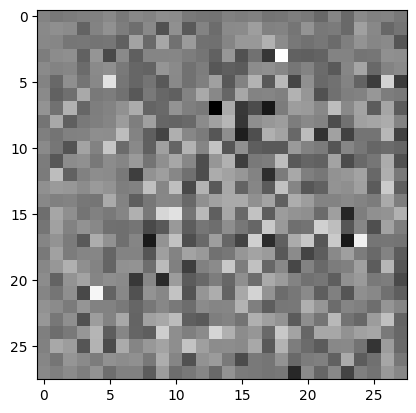

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

Generate the summary of the generator model

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (Batch  (None, 12544)             50176     
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 7, 7, 128)         819200    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 128)         5

Create the discriminator model to distinguish between real and fake images.

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Create an inference for the discriminator model also.

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00115555]], shape=(1, 1), dtype=float32)


In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

ENTROPY LOSSES

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

Define your optimisers . Th eoptimiser used in the code is Adam Optimiser

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

Provide the directory to save the checkpoints

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

Define epoch and seed to get same random images

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

Train function which is defined to illustarte what happens for each epoch .

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

Save images

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

Train the dataset , and also save images for each epoch

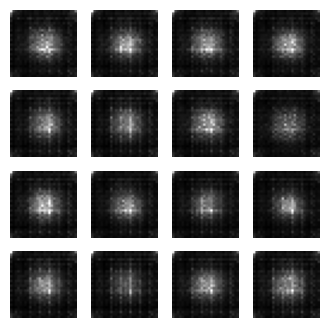

In [ ]:
train(train_dataset, EPOCHS)